**Prediction is on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile**

Load the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dataset=pd.read_csv('https://raw.githubusercontent.com/jeevanjagadish/ML-Predictions-Projects/master/Mobile%20price%20prediction/train.csv')

In [5]:
dataset.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

Data Analysis

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
dataset.describe()

battery_power       blue  ...         wifi  price_range
count    2000.000000  2000.0000  ...  2000.000000  2000.000000
mean     1238.518500     0.4950  ...     0.507000     1.500000
std       439.418206     0.5001  ...     0.500076     1.118314
min       501.000000     0.0000  ...     0.000000     0.000000
25%       851.750000     0.0000  ...     0.000000     0.750000
50%      1226.000000     0.0000  ...     1.000000     1.500000
75%      1615.250000     1.0000  ...     1.000000     2.250000
max      1998.000000     1.0000  ...     1.000000     3.000000

[8 rows x 21 columns]

visualization

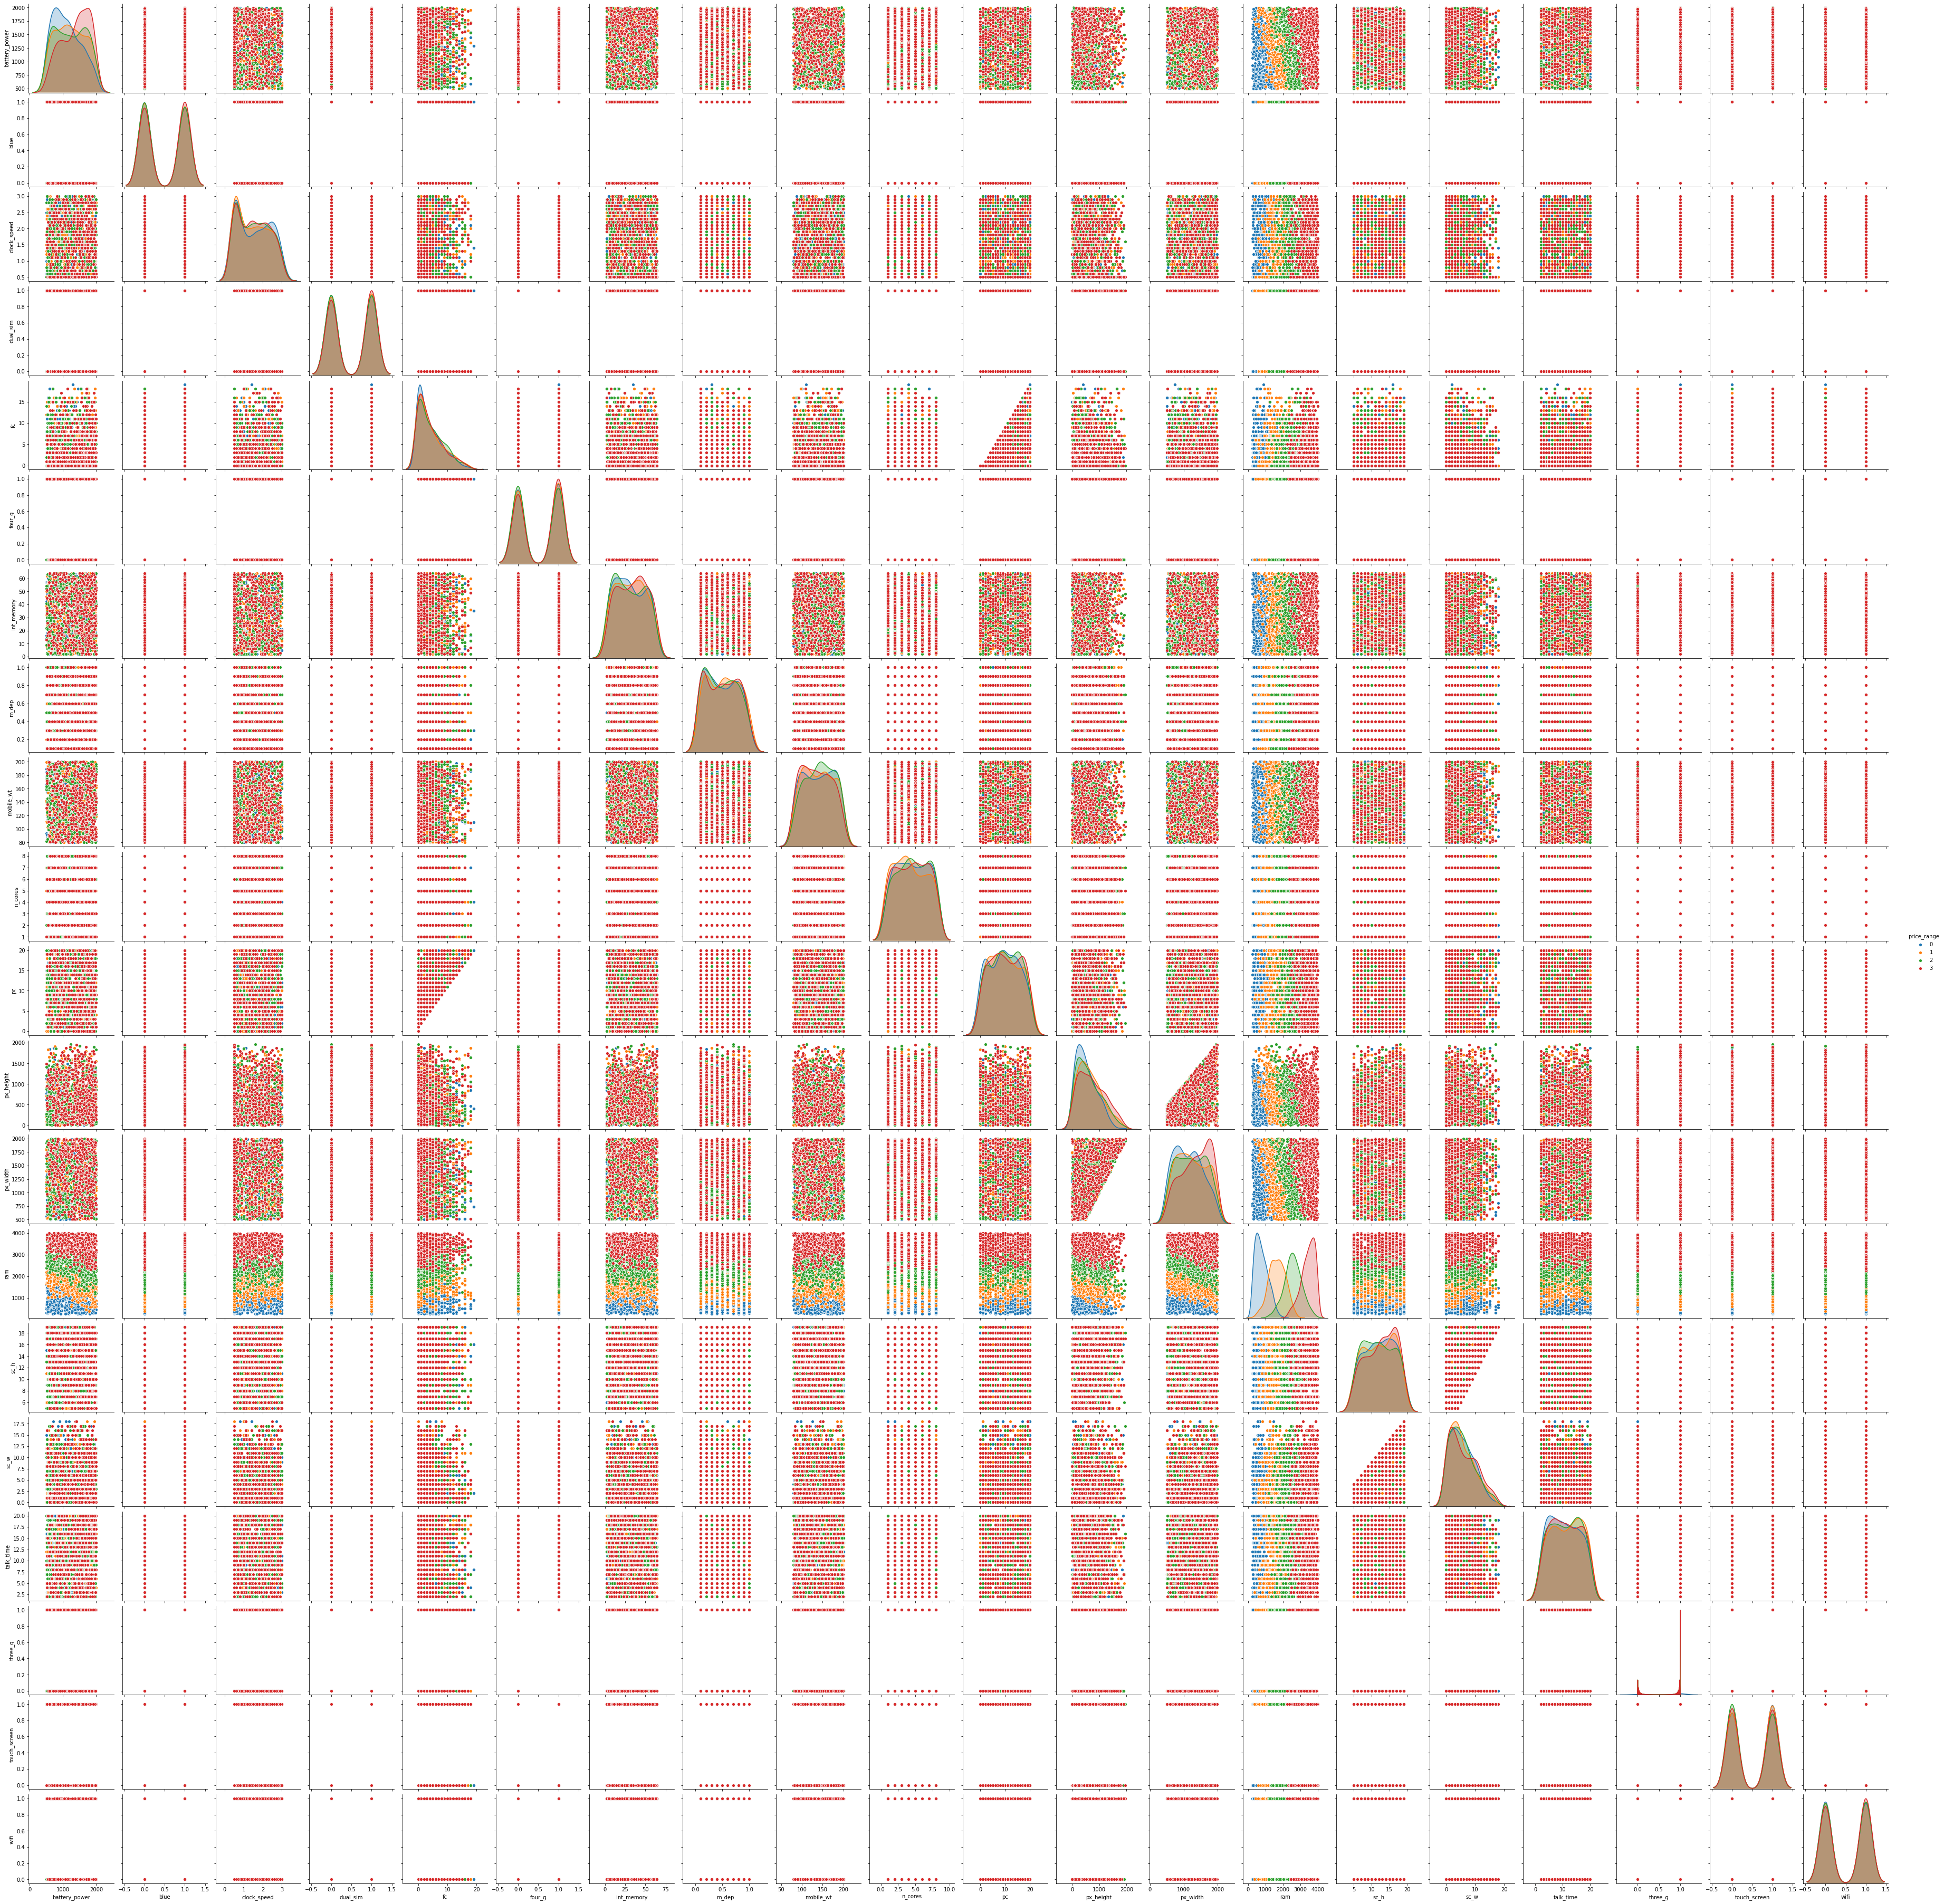

In [8]:
sns.pairplot(dataset,hue='price_range')

Internal Memory vs Price Range

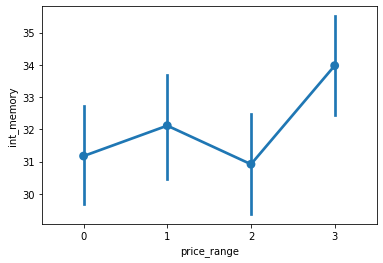

In [9]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

Percentage of Phones which support 3G

In [10]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

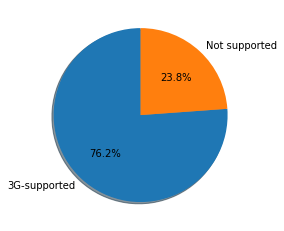

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Percentage of Phones which support 4G

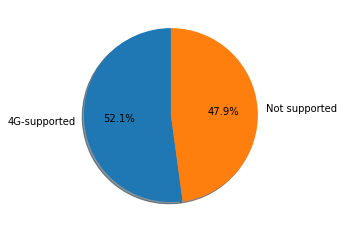

In [12]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Battery power vs Price Range

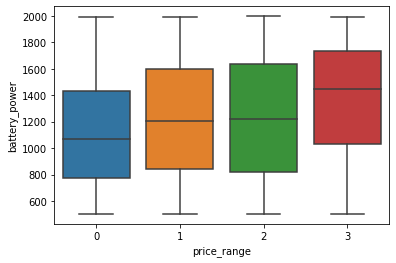

In [13]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

No of Phones vs Camera megapixels of front and primary camera¶

Text(0.5, 0, 'MegaPixels')

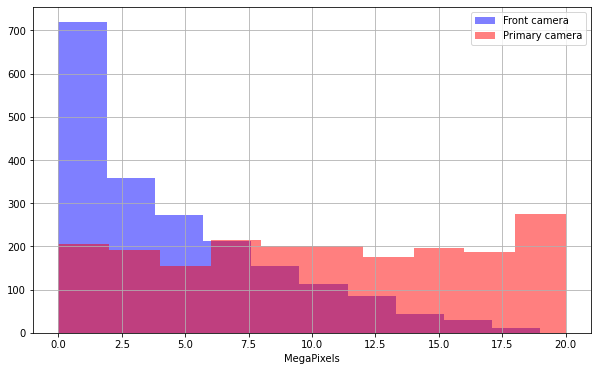

In [14]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

Mobile Weght vs Price range


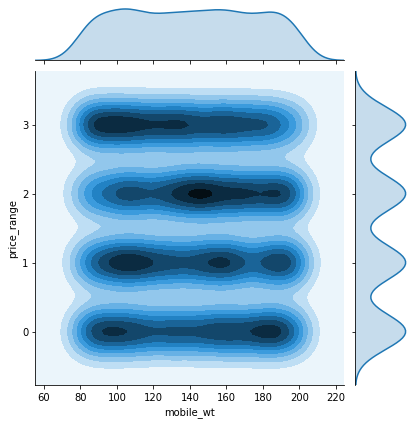

In [15]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');


Talk time vs Price range

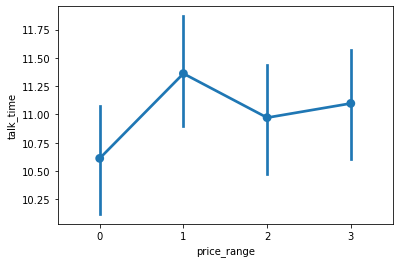

In [16]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

X & Y array

In [17]:
X=dataset.drop('price_range',axis=1)

In [18]:
y=dataset['price_range']

Split the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


Creating & Training Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm.score(X_test,y_test)

0.9132801488185277

**Creating and training KNN model**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
knn.score(X_test,y_test)

0.9212121212121213

Elbow Method For optimum value of K

In [26]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

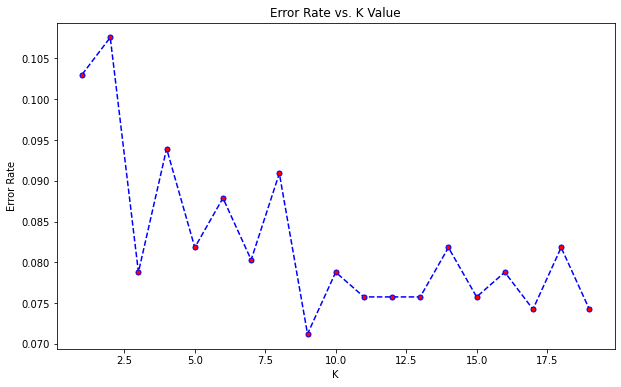

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Creating & Training Decision Tree Model

In [1]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
dtree.score(X_test,y_test)

0.8303030303030303

**Tree Visualization**

In [30]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

Creating & Training Random Tree Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc.score(X_test,y_test)

0.8787878787878788

# **Conclusion: KNN & Linear Regression performed the best**

RESULT : Linear Regression

In [34]:
y_pred=lm.predict(X_test)

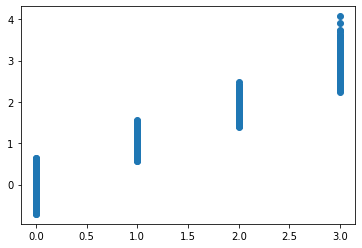

In [35]:
plt.scatter(y_test,y_pred)

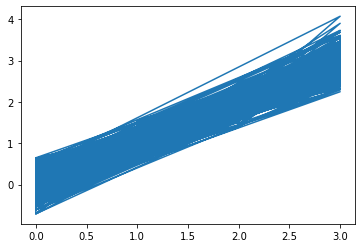

In [36]:
plt.plot(y_test,y_pred)

RESULT: KNN

In [37]:
from sklearn.metrics import classification_report,confusion_matrix


In [38]:
pred = knn.predict(X_test)


In [39]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [40]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


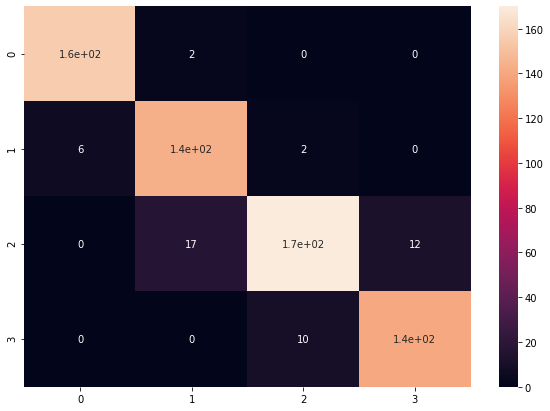

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)